In [2]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=8dd4dc649b7d4c0bfad42d08acb84a87f65e5f4392d056fa5ce80757d77ce694
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [5]:
#step:1 create the universe of discourse
i1 = ctrl.Antecedent(np.arange(0,11,1), 'I1')
i2 = ctrl.Antecedent(np.arange(0,11,1), 'I2')
o = ctrl.Consequent(np.arange(0,11,1), 'O')



In [6]:
#step:2 define fuzzy membership function
i1['L'] = fuzz.trimf(i1.universe, [0,0,5])
i1['M'] = fuzz.trimf(i1.universe, [0,5,10])
i1['H'] = fuzz.trimf(i1.universe, [5,10,10])

i1['L'] = fuzz.trimf(i1.universe, [0,0,5])
i1['M'] = fuzz.trimf(i1.universe, [0,5,10])
i1['H'] = fuzz.trimf(i1.universe, [5,10,10])

i2['L'] = fuzz.trimf(i1.universe, [0,0,5])
i2['M'] = fuzz.trimf(i1.universe, [0,5,10])
i2['H'] = fuzz.trimf(i1.universe, [5,10,10])

o['L'] = fuzz.trimf(i1.universe, [0,0,5])
o['M'] = fuzz.trimf(i1.universe, [0,5,10])
o['H'] = fuzz.trimf(i1.universe, [5,10,10])

(<Figure size 640x480 with 1 Axes>, <Axes: >)

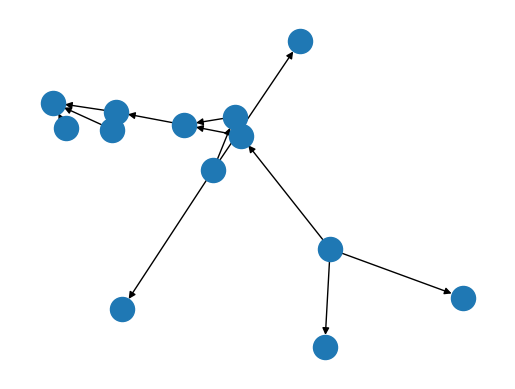

In [8]:
#step:3 Define the rule base
rule1 = ctrl.Rule(i1['L'] & i2['L'], o['L'])
rule2 = ctrl.Rule(i1['L'] & i2['M'], o['L'])
rule3 = ctrl.Rule(i1['L'] & i2['H'], o['M'])
rule4 = ctrl.Rule(i1['M'] & i2['L'], o['L'])
rule5 = ctrl.Rule(i1['M'] & i2['M'], o['M'])
rule6 = ctrl.Rule(i1['M'] & i2['H'], o['H'])
rule7 = ctrl.Rule(i1['H'] & i2['L'], o['M'])
rule8 = ctrl.Rule(i1['H'] & i2['M'], o['H'])
rule9 = ctrl.Rule(i1['H'] & i2['H'], o['H'])

rule1.view()

Output 5.0


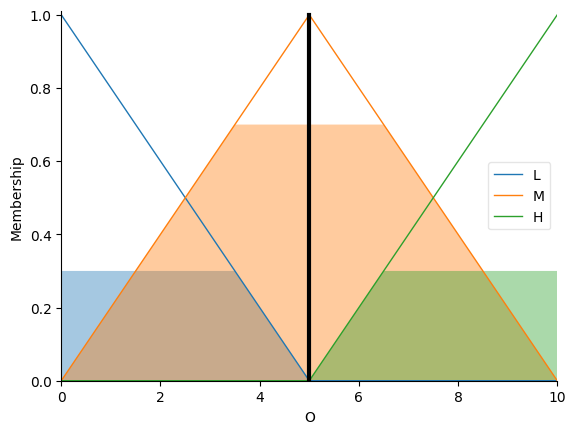

In [10]:
#step 4: Fuzzy inference system

o_control = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
o_simulation = ctrl.ControlSystemSimulation(o_control)

o_simulation.input['I1'] = 3.5
o_simulation.input['I2'] = 6.5

o_simulation.compute()
print("Output",o_simulation.output['O'])
o.view(sim=o_simulation)

